# Credit Risk Model
*   adalah sebuah model untuk memprediksi pinjaman mana yang akan **gagal bayar**
*   di dalam kasus ini masuk ke dalam klasifikasi biner, *bukan forecasting, clustering, regresi*
*   Klasifikasi biner bernilai 0 atau 1
*   1 artinya gagal bayar, 0 artinya bayar tepat waktu








# Studi Kasus
Misalkan ingin membeli motor dan tidak punya uang yang cukup. Nah disini kita mengajukan kredit ke pihak bank. Setelah mengisi form pengajuan, bagian risk analyst dari bank akan datang ke rumah untuk menanyakan data yang di isi sesuai dengan aktual tidak. Disini risk analyst akan meninjau behaviour kita sebagai pengaju, dan dia yang akan menentukan apakah pengajuan di approve atau tidak.
Sebenarnya analisis manusia lebih bagus dari pada mesin, hanya saja jika pengajuan dalam sehari mencapai ribuan dan kasus peminjaman yg bervariasi maka diperlukan teknologi. 
Teknologi modeling digunakan untuk membantu risk analyst menentukan mana yang layak untuk di tinjau

# Dataset 
Dataset yang digunakan dapat di unduh disini : https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans

In [260]:
import numpy as np
import pandas as pd
import os

In [261]:
os.listdir()

['.ipynb_checkpoints',
 'a DQLab_Pearson_Correlation.ipynb',
 'b DQLab_Linear_Regression_Sederhana.ipynb',
 'c DQLab_Linear_Regression_Ganda.ipynb',
 'credit_risk_model.ipynb',
 'd DQLab_K_Means.ipynb',
 'e DQLab_Normal_Distribution.ipynb',
 'lc_2016_2017.csv',
 'Perhitungan Manual Lengkap.xlsx']

In [262]:
loan_data = pd.read_csv('lc_2016_2017.csv')

c:\users\ditan\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [263]:
# Profiling
loan_data.head() #ada 72 columns

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [264]:
# cek jumlah row
loan_data.shape #(759338, 72)

(759338, 72)

In [265]:
# cek missing value
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

In [266]:
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

# Target variabel: klasifikasi status pembayaran as good_bad
1 -> charged off, default, late (31-120), late (16-30)
0 -> current, fully paid, in grace period

In [267]:
loan_data['good_bad'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off', 'Default','Late (31-120 days)', 'Late (16-30 days)' ])
                                , 1, 0)

In [268]:
loan_data.good_bad.value_counts()

0    702875
1     56463
Name: good_bad, dtype: int64

In [269]:
loan_data[['loan_status', 'good_bad']]

,loan_status,good_bad
0,Current,0
1,Current,0
2,Current,0
3,Current,0
4,Current,0
...,...,...
759333,Current,0
759334,Current,0
759335,Late (16-30 days),1
759336,Current,0


# Remove Missing Value
Apabila kolom dengan missing value yg banyak tidak dihapus, maka model akan sulit untuk memprediksi akibat kolom yg masih kosong tersebut
- Kolom yang memiliki missing value lebih dari 50 % akan di drop, karena jika ingin diisi dengan nilai lain spt median atau mean errornya akn sangat tinggi


In [270]:
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])

In [271]:
missing_values

,0
id,0.000000
member_id,1.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
...,...
total_rev_hi_lim,0.000000
inq_fi,0.000080
total_cu_tl,0.000082
inq_last_12m,0.000082


In [272]:
# filter missing _value yg memiliki 50 %
missing_values = missing_values[missing_values.iloc[:,0] > 0.5]

In [273]:
missing_values.sort_values([0], ascending=False) #0 karena nama kolomnya nol

,0
member_id,1.000000
desc,0.999978
dti_joint,0.955223
annual_inc_joint,0.955220
verification_status_joint,0.955220
mths_since_last_record,0.814076
mths_since_last_major_derog,0.716720


In [274]:
'''
berdasarkan data diatas maka yang perlu di drop adalah 
member_id, desc, 
dti_joint, annual_inc_joint
axis => lebih fokus kekolom

'''
loan_data.dropna(thresh = loan_data.shape[0]*0.5, how='all', axis=1, inplace=True)

In [275]:
# pengecekan kembali apakah kolom sudah berhasil di drop
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.5]
missing_values.sort_values([0], ascending=False)

,0


# Data Splitting
## Train Set dan Test Set
Tujuan dibagi menjadi dua data set adalah untuk mengukur kemampuan machine learning dlm memprediksi data yg baru

In [276]:
loan_data.shape

(759338, 66)

In [277]:
# 80 % data untuk data train, 20 % data untuk data test
from sklearn.model_selection import train_test_split

In [278]:
# definisi variabel x 
X = loan_data.drop('good_bad', axis=1) #good_bad akan dijadikan variabel y
y = loan_data['good_bad']

# dari fungsi train_test_split akan dihasilkan 4 variabel
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [279]:
X_train.shape, X_test.shape #((607470, 65), (151868, 65))

((607470, 65), (151868, 65))

In [280]:
# cek distribusi variable target di masing2 dataset
y_train.value_counts(normalize=True)

0    0.925642
1    0.074358
Name: good_bad, dtype: float64

In [281]:
y_test.value_counts(normalize=True)

0    0.925639
1    0.074361
Name: good_bad, dtype: float64

In [282]:
'''
dari hasil diatas distribusi 0 itu sekitar 92 % dan 
distribusi 1 itu sekitar 7 %, kasus ini disebut imbalance dataset
dimana kelas 1 (bad_loan) nilainya nya kecil

Nah karena kasus diatas antar train set sama test set hampir sama distribusi nya jd
jd gak masalah. kalau misal ditemukan beda distribusi antara train set sama test set
itu bisa diakali dg stratify

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

random_state = 42 -> biar random nya tidak berubah

'''


'\ndari hasil diatas distribusi 0 itu sekitar 92 % dan \ndistribusi 1 itu sekitar 7 %, kasus ini disebut imbalance dataset\ndimana kelas 1 (bad_loan) nilainya nya kecil\n\nNah karena kasus diatas antar train set sama test set hampir sama distribusi nya jd\njd gak masalah. kalau misal ditemukan beda distribusi antara train set sama test set\nitu bisa diakali dg stratify\n\nX_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)\n\nrandom_state = 42 -> biar random nya tidak berubah\n\n'

# Data Cleaning
## real world implementation untuk data splitting
Pada kenyataan data set itu dibagi menjadi 3 yaitu: **training**, **validation**, dan **test**

- Jadi nantinya akan dicoba berbagai macam model, nah model2 tersebut akan divalidasi dan dipilih model dengan akurasi paling tepat
- Data test adalah hasil akhir dari metric yang akna disampaikan ke atasan

In [283]:
X_train.shape

(607470, 65)

## Strategi: cek kolom yang memiliki data masih kotor

- fokus ke variabel-variabel kategorik (object non numerik)
- baru bersihkan kolom2 yang numeric

In [284]:
# column kategorik
## cek data unique untuk tipe kategori
for col in X_train.select_dtypes(include = ['object', 'bool']).columns:
    print(col)
    print(X_train[col].unique())
    print()

term
['36 months' '60 months']

grade
['C' 'A' 'B' 'E' 'D' 'G' 'F']

sub_grade
['C1' 'A1' 'B1' 'B5' 'A4' 'E2' 'A5' 'D1' 'C4' 'C3' 'G3' 'D3' 'E1' 'C5'
 'D2' 'C2' 'A2' 'E3' 'D5' 'E4' 'B2' 'F2' 'B4' 'A3' 'D4' 'B3' 'F1' 'F5'
 'G2' 'E5' 'F3' 'G1' 'G5' 'F4' 'G4']

emp_title
['Administrative assistant' 'director of workforce development' 'Nanny'
 ... 'Operations Planning Manager' 'Sr. xPression Developer'
 'making plant planner']

emp_length
['4 years' '10+ years' '< 1 year' '5 years' '6 years' '7 years' '2 years'
 '3 years' '8 years' '1 year' nan '9 years']

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE']

verification_status
['Source Verified' 'Not Verified' 'Verified']

issue_d
['Feb-2017' 'Apr-2016' 'Jul-2017' 'Oct-2016' 'Mar-2017' 'May-2016'
 'Mar-2016' 'Aug-2017' 'Jul-2016' 'Jan-2017' 'Sep-2016' 'Aug-2016'
 'Nov-2016' 'Dec-2016' 'Jun-2016' 'Sep-2017' 'Feb-2016' 'May-2017'
 'Jun-2017' 'Apr-2017' 'Jan-2016']

loan_status
['Current' 'Fully Paid' 'Late (16-30 days)' 'Charged Off'
 'La

['ND' 'NY' 'UT' 'FL' 'IL' 'TX' 'PA' 'GA' 'VA' 'WI' 'OH' 'ID' 'CA' 'MO'
 'IN' 'NJ' 'SC' 'MI' 'CT' 'NM' 'TN' 'AZ' 'MN' 'WA' 'LA' 'CO' 'KS' 'MA'
 'NV' 'MD' 'OR' 'AL' 'NC' 'MS' 'OK' 'VT' 'DC' 'KY' 'AR' 'ME' 'DE' 'NE'
 'NH' 'WY' 'HI' 'AK' 'SD' 'MT' 'RI' 'WV']

earliest_cr_line
['Aug-1994' 'Sep-2001' 'May-1999' 'Jun-2005' 'Jan-2012' 'Jan-2001'
 'Aug-1991' 'Feb-2006' 'Oct-1989' 'Oct-2000' 'Jun-2001' 'Dec-1993'
 'May-1989' 'Sep-2006' 'Sep-1997' 'Sep-2003' 'May-1982' 'Dec-1996'
 'Jun-1999' 'Oct-2003' 'Sep-2008' 'May-1994' 'Sep-2004' 'Jul-2007'
 'Feb-2008' 'Aug-1985' 'Aug-2002' 'Nov-1998' 'Mar-2012' 'Feb-1993'
 'Aug-2001' 'May-1987' 'Mar-2004' 'Mar-1978' 'Apr-1996' 'Oct-1995'
 'May-2006' 'Oct-2012' 'Dec-2001' 'Jul-2001' 'May-2004' 'Feb-2005'
 'Jul-1995' 'May-2007' 'Feb-2004' 'Feb-2001' 'Jul-2004' 'Sep-1998'
 'Jul-2006' 'Sep-1993' 'Jun-2012' 'Jul-2005' 'Jun-2011' 'Nov-2006'
 'Nov-2002' 'Jan-1996' 'Jul-2003' 'Sep-2007' 'Aug-1999' 'Feb-1994'
 'Apr-2003' 'Aug-2004' 'Oct-2013' 'Dec-2002' 'May-2012' '

### Penjelasan
- kolom **term**, **emp_length**, **issue_d**, **earliest_cr_line**, **last_pymnt_d**, **next_pymnt_d**, **last_credit_pull_d** bisa diubah ke numerik


In [285]:
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line',
                     'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [286]:
X_train['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [287]:
# menghilangkan 'month' pada term serta mengubah tipe nya dari object ke numeric
X_train['term'] = pd.to_numeric(X_train['term'].str.replace(' months', ''))

In [288]:
# mengubah tipe data term dari object ke numeric
X_train['term']

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: int64

In [289]:
X_train['emp_length'].unique()

array(['4 years', '10+ years', '< 1 year', '5 years', '6 years',
       '7 years', '2 years', '3 years', '8 years', '1 year', nan,
       '9 years'], dtype=object)

In [290]:
X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace('1 year', str(1))
X_train['emp_length'].fillna(value = 0, inplace=True)

c:\users\ditan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [291]:
X_train['emp_length'].unique()

array(['4', '10', '0', '5', '6', '7', '2', '3', '8', '1', 0, '9'],
      dtype=object)

In [292]:
#ubah ke numerik
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

In [293]:
# ubah data ke date
col_date = ['issue_d', 'earliest_cr_line','last_pymnt_d',
            'next_pymnt_d', 'last_credit_pull_d']
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,Feb-2017,Aug-1994,Dec-2017,Jan-2018,Dec-2017
505776,Apr-2016,Sep-2001,Jul-2017,NaN,Nov-2017
412425,Jul-2017,May-1999,Dec-2017,Jan-2018,Dec-2017
618730,Oct-2016,Jun-2005,Dec-2017,Jan-2018,Dec-2017
111143,Mar-2017,Jan-2012,Dec-2017,Jan-2018,Dec-2017
...,...,...,...,...,...
150426,Feb-2017,Nov-1998,Nov-2017,NaN,Dec-2017
195135,Jan-2017,Sep-1993,Dec-2017,Jan-2018,Dec-2017
182511,Jan-2017,Mar-1988,Dec-2017,Jan-2018,Dec-2017
82596,Apr-2017,Jan-2003,Dec-2017,Jan-2018,Dec-2017


In [294]:
X_train['issue_d'] = pd.to_datetime(X_train['issue_d'])

In [295]:
X_train['issue_d']

147577   2017-02-01
505776   2016-04-01
412425   2017-07-01
618730   2016-10-01
111143   2017-03-01
            ...    
150426   2017-02-01
195135   2017-01-01
182511   2017-01-01
82596    2017-04-01
165904   2017-02-01
Name: issue_d, Length: 607470, dtype: datetime64[ns]

In [296]:
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col])

In [297]:
X_train[col_date] #NaT (not a time)

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,2017-02-01,1994-08-01,2017-12-01,2018-01-01,2017-12-01
505776,2016-04-01,2001-09-01,2017-07-01,NaT,2017-11-01
412425,2017-07-01,1999-05-01,2017-12-01,2018-01-01,2017-12-01
618730,2016-10-01,2005-06-01,2017-12-01,2018-01-01,2017-12-01
111143,2017-03-01,2012-01-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...
150426,2017-02-01,1998-11-01,2017-11-01,NaT,2017-12-01
195135,2017-01-01,1993-09-01,2017-12-01,2018-01-01,2017-12-01
182511,2017-01-01,1988-03-01,2017-12-01,2018-01-01,2017-12-01
82596,2017-04-01,2003-01-01,2017-12-01,2018-01-01,2017-12-01


### Penjelasan (lanjutan)
- lakukan hal yg sama untuk data test

In [298]:
X_test['term'] = pd.to_numeric(X_test['term'].str.replace(' months', ''))

X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace('1 year', str(1))
X_test['emp_length'].fillna(value = 0, inplace=True)
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])

col_date = ['issue_d', 'earliest_cr_line','last_pymnt_d',
            'next_pymnt_d', 'last_credit_pull_d']
for col in col_date:
    X_test[col] = pd.to_datetime(X_test[col])

c:\users\ditan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [299]:
X_test[col_need_to_clean]

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
280647,60,10,2016-07-01,1999-11-01,2017-05-01,NaT,2017-12-01
419992,36,7,2017-07-01,2006-01-01,2017-12-01,2018-01-01,2017-12-01
44633,36,0,2017-05-01,1976-12-01,2017-11-01,2018-01-01,2017-05-01
245940,36,2,2016-08-01,2005-12-01,2017-11-01,2018-01-01,2017-12-01
565744,36,0,2016-11-01,1970-10-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...,...,...
70748,36,4,2017-05-01,2012-03-01,2017-12-01,2018-01-01,2017-12-01
43047,60,4,2017-05-01,2002-07-01,2017-12-01,2018-01-01,2017-12-01
99030,36,0,2017-04-01,2003-08-01,2017-12-01,2018-01-01,2017-03-01
625689,36,1,2016-03-01,2012-08-01,2017-12-01,2018-01-01,2017-12-01


In [300]:
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151868 entries, 280647 to 267584
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                151868 non-null  int64         
 1   emp_length          151868 non-null  int64         
 2   issue_d             151868 non-null  datetime64[ns]
 3   earliest_cr_line    151868 non-null  datetime64[ns]
 4   last_pymnt_d        151655 non-null  datetime64[ns]
 5   next_pymnt_d        118276 non-null  datetime64[ns]
 6   last_credit_pull_d  151867 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 9.3 MB


### Penjelasan
- membersihkan kolom numerik (Challange)


In [301]:
# column numerik
## cek data unique untuk tipe numerik
for col in X_train.select_dtypes(include = ['int', 'float']).columns:
    print('task buat kamyu')

task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu
task buat kamyu


# Modelling
- model yang akan dipakai adalah **credit risk model** 
- model ini untuk memprediksi pinjaman mana yang akan gagal bayar
- dalam kasus ini hanya digunakan beberapa kolom saja untuk modeling. pada case
  ini hanya yg kategori
     - term : berapa lama kredit dilunaskan (jatuh tempo)
     - emp_length: berapa lama dia sudah bekerja
     - issue_d : kapan pinjaman akan di cairkan
     - earliest_cr_line: kapan kredit ini dibuka pertama kali (dpt diakses)
     - last_pymnt_d: kapan terakhir pembayaran kredit
     - next_pymnt_d: kapan pembayaran selanjutnya (klw scr logika ini bisa di drop)
     - last_credit_pull_d: kapan kredit orang ini di evaluasi
- machine learning yang digunakan memerlukan input angka. 

In [302]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((607470, 65), (607470,), (151868, 65), (151868,))

In [303]:
col_need_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [304]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

In [305]:
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [306]:
X_train.shape, X_test.shape

((607470, 6), (151868, 6))

# Feature Engineering
- sebelum modelling, kita perlu menyesuaikan data nya. Disini ditambah kolom lain yang bisa diinput ke dalam model machine learning nya

In [307]:
from datetime import date
date.today().strftime('%Y-%m-%d')

'2023-01-03'

In [308]:
# misalkan untuk data date kita bisa manipulasi berapa hari dari sekarang
pd.to_datetime(date.today().strftime('%Y-%m-%d')) - pd.to_datetime('2017-02-01')

Timedelta('2162 days 00:00:00')

In [309]:
# buat fungsi untuk feature engineering kolom date
def date_columns(df, column):
    today_date =  pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    df[column] = pd.to_datetime(df[column], format='%b-%y')
    df['mths_since_'+column]= round(pd.to_numeric((today_date - df[column])/np.timedelta64(1, 'M')))
    df.drop(columns = [column], inplace=True)


In [310]:
#apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

In [311]:
#apply to X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [312]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((607470, 6), (607470,), (151868, 6), (151868,))

In [313]:
# double check apakah x_test masih ada missing value
X_test.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line        0
mths_since_issue_d                 0
mths_since_last_pymnt_d          213
mths_since_last_credit_pull_d      1
dtype: int64

In [314]:
X_train.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line        0
mths_since_issue_d                 0
mths_since_last_pymnt_d          735
mths_since_last_credit_pull_d     17
dtype: int64

In [315]:
# isi missing value dengan median

X_test.fillna(X_train.median(), inplace=True)
X_train.fillna(X_train.median(), inplace=True)

# Modelling
- rule of thumbs pemodelan adalah diawali dengan model yang sederhana.
  biasanya bisa gunakan logisticregression, 
- kalau gak bagus, bisa dilanjut pakai decision tree, random forest

In [316]:
from sklearn.linear_model import LogisticRegression

In [317]:
model = LogisticRegression()

In [319]:
#model.fit artinya akan mempeljari pola pola X_train dan y_train yg diberikan
model.fit(X_train, y_train) 
# menguji X_test, analogi ini spt kita ujian di beri soal X_test, nah hasil ujian itu y_pred
y_pred= model.predict(X_test)

c:\users\ditan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [323]:
# buat data frame 
# analogi nya y_test itu adalah kunci jawaban
result = pd.DataFrame(list(zip(y_pred, y_test)), columns = ['y_pred', 'y_test'])
result.head()

,y_pred,y_test
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [324]:
# cek berapa prediksi yang benar dg akurasi skor
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.917303184344299

In [325]:
# selain akurasi score, kita bisa ukur dg confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


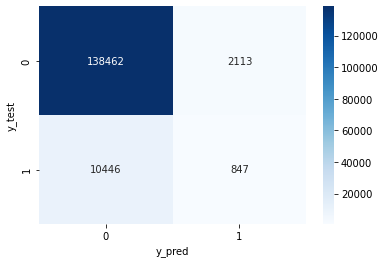

In [331]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show() # hasil yg diagonal merupakan hasil yang benar

## Kesimpulan modeling diatas
- Prediksi untuk data 'gagal bayar' masih banyak meleset dibanding yang 'lancar bayar'
- Ini dikarenakan imbalance pada data train. data untuk 'lancar bayar' itu hampir 92 %. untuk mengukur akurasi dg 'accuracy score' ini bisa misleading untuk kasus imbalance, alternatif nya bisa gunakan 'ROC AUC'

In [333]:
y_train.value_counts(normalize=True)

0    0.925642
1    0.074358
Name: good_bad, dtype: float64

# Modelling II
- hasil dari model.predict(X_test) adalah langsung bentuk decision nya, 0 atau 1
- jika ingin melihat probability dari 2 kemungkinan nya, bisa pakai model.predict_proba 
- kita bisa set threshold (batasan) untuk probability nya. default threshold untuk model.predict adalah 0.5
- pada kasus imbalance train, kita tidak bisa gunakan threshold 0.5

In [339]:
model.predict(X_test) #default threshold untuk model.predict adalah 0.5

array([0, 0, 0, ..., 0, 0, 0])

In [340]:
model.predict_proba(X_test) 

array([[0.77492363, 0.22507637],
       [0.9751867 , 0.0248133 ],
       [0.9895792 , 0.0104208 ],
       ...,
       [0.99113969, 0.00886031],
       [0.93485035, 0.06514965],
       [0.96291513, 0.03708487]])

In [341]:
#ambil probability untuk yang gagal bayar
y_pred = model.predict_proba(X_test)[:,1]

In [342]:
y_pred

array([0.22507637, 0.0248133 , 0.0104208 , ..., 0.00886031, 0.06514965,
       0.03708487])

(array([131146.,   9232.,   4342.,   2410.,   1539.,   1036.,    855.,
           670.,    444.,    194.]),
 array([0.00140101, 0.09684691, 0.19229281, 0.2877387 , 0.3831846 ,
        0.4786305 , 0.57407639, 0.66952229, 0.76496819, 0.86041408,
        0.95585998]),
 <BarContainer object of 10 artists>)

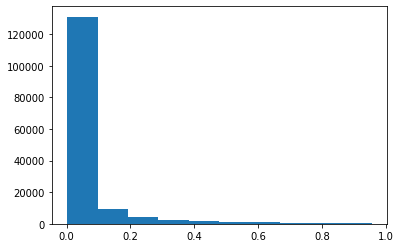

In [344]:
# profile probabilitas 
plt.hist(y_pred) #dari profil terlihat banyak prob nya dari 0.0 - 0.2, cari threshold diantara itu

In [349]:
# mencari best threshold
## 1. cari true positive rate dan false positive rate
'''
False Positive Rate (FPR) = False Positive / (False Positive + True Negative)
True Positive Rate (TPR) = True Positive / (True Positive + False Negative)

'''

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
thresholds

array([1.95585998e+00, 9.55859982e-01, 9.37762791e-01, ...,
       2.65924457e-03, 2.52993131e-03, 1.40101224e-03])

In [351]:
## cari thresholds dengan youden j-statistic
j = tpr - fpr

ix = np.argmax(j)
best_thresh = thresholds[ix]

In [352]:
best_thresh

0.06645641005079475

In [360]:
## lakukan prediksi ulang dg nilai thresh tadi
y_pred = model.predict_proba(X_test)[:,1]
y_pred = (y_pred > 0.066).astype(int)

In [361]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

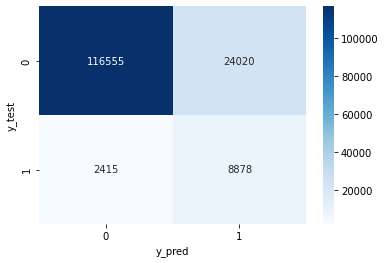

In [362]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show() # hasil yg diagonal merupakan hasil yang benar

## Kesimpulan dari perbaikan threshold
- prediksi gagal bayar yang benar meningkat dari sebelumnya

# Model Interpretation
- menginterpretasikan model coef
- jika nilai nya positif berarti berbanding lurus, jika negatif artinya berbanding terbalik
- contoh nilai df_coeff untuk term itu positif, artinya semakin lama jangka pembayaran semakin mungkin untuk gagal bayar.
- contoh juga untuk nilai df_coeff (emp_length: lama bekerja) : nilainya negatif artinya semakin lama dia bekerja, maka semakin kecil kemungkinan gagal bayar

In [363]:
model.coef_

array([[ 0.01718   , -0.03168197, -0.00103296,  0.04599087,  0.23459991,
        -0.15286833]])

In [365]:
model.intercept_

array([-11.87825519])

In [366]:
df_coeff = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coeff #ini masih dalam bentuk logit

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,0.01718,-0.031682,-0.001033,0.045991,0.2346,-0.152868


In [364]:
X_train.head()

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
147577,36,4,341.0,71.0,61.0,61.0
505776,36,10,256.0,81.0,66.0,62.0
412425,36,0,284.0,66.0,61.0,61.0
618730,36,5,211.0,75.0,61.0,61.0
111143,36,6,132.0,70.0,61.0,61.0


# Referensi
- [Playlist Credit Risk Model](https://www.youtube.com/watch?v=z8FC9smiZt0&list=PLDMiUlv2m2BPSIqBvHdEmQd1yIOkcMF_8&index=6)
- [Sumber kode lengkap](https://github.com/HaloTech-Academy/Credit-Risk-Modelling/blob/main/Credit%20Risk%20Modelling.ipynb)